# K-means

A: n차원의 데이터 포인트,
B: initialized 된 k개의 centroid 점들

1. A와 B 거리 계산해서 A에 B 할당
2. B를 업데이트
3. 1, 2 과정을 반복

* cost : J() = 1/m sum(example - mean)^2

* random initialized
- k를 어디에 처음으로?
    - example에 해당하는 점

* k를 몇개?
- elbow method
    - 각 k를 군집으로 두고 cost 계산 
    - 기울기(델타)가 가장 완만해지는 때에 선택

---

+ 가우시안 믹스쳐 모델

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [77]:
x_data, y_data = datasets.make_blobs()

In [78]:
x_data.shape, y_data.shape

((100, 2), (100,))

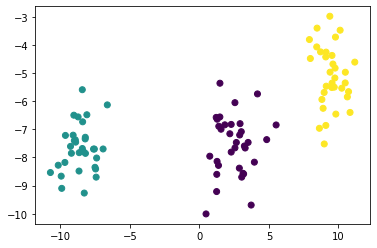

In [79]:
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [80]:
def cost(x, c):
  return np.sqrt((x-c)**2).sum(axis=-1)

In [89]:
K = 3
centroids = np.array(((-10, -7), (0, -5), (10, -4)))

for i in range(100):
  labels = []

  for i, x in enumerate(x_data):
    labels.append(np.argmin(cost(x, centroids)))
  labels = np.asarray(labels)

  J = 0
  for k in range(K):
    centroids[k] = x_data[labels==k,:].mean(axis=0)
    J += cost(x_data[labels==k], centroids[k]).mean()
  
  if i % 10 == 0:
    print(J)

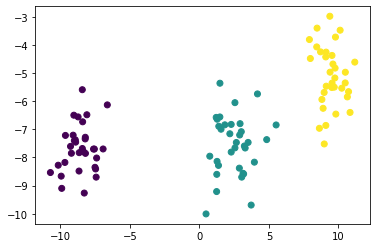

In [90]:
plt.scatter(x_data[:,0], x_data[:,1], c=labels)
plt.show()

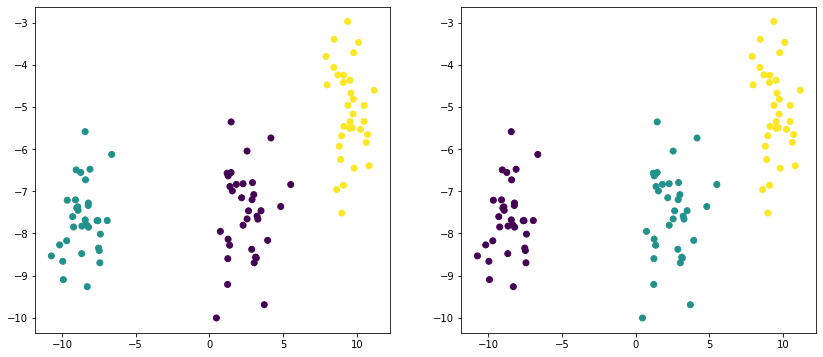

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='white', figsize=(14,6))
ax1.scatter(x_data[:,0], x_data[:,1], c=y_data)
ax2.scatter(x_data[:,0], x_data[:,1], c=labels)